# Football 2022 Analysis Project

#### Imports of libraries

In [601]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas

#### Data declaration

In [602]:
data_filename = './FIFA22_official_data.csv' 

#### Data Cleansing and preparation
##### Steps :-

- Load the file using pandas
- Look at the information about data and columns 
- Clear the incorrect data 

In [603]:
data_frame = pd.read_csv (data_filename)
data_frame

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,240558,18 L. Clayton,17,https://cdn.sofifa.com/players/240/558/18_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,53,70,Cheltenham Town,https://cdn.sofifa.com/teams/1936/30.png,...,12.0,55.0,54.0,52.0,50.0,59.0,GK,52.0,€238K,NaN
16706,262846,�. Dobre,20,https://cdn.sofifa.com/players/262/846/22_60.png,Romania,https://cdn.sofifa.com/flags/ro.png,53,63,FC Academica Clinceni,https://cdn.sofifa.com/teams/113391/30.png,...,12.0,57.0,52.0,53.0,48.0,58.0,GK,53.0,€279K,5.0
16707,241317,21 Xue Qinghao,19,https://cdn.sofifa.com/players/241/317/21_60.png,China PR,https://cdn.sofifa.com/flags/cn.png,47,60,Shanghai Shenhua FC,https://cdn.sofifa.com/teams/110955/30.png,...,9.0,49.0,48.0,45.0,38.0,52.0,GK,47.0,€223K,21.0
16708,259646,A. Shaikh,18,https://cdn.sofifa.com/players/259/646/22_60.png,India,https://cdn.sofifa.com/flags/in.png,47,67,ATK Mohun Bagan FC,https://cdn.sofifa.com/teams/113146/30.png,...,13.0,49.0,41.0,39.0,45.0,49.0,GK,47.0,€259K,7.0


In [604]:
data_frame.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       'DefensiveAwareness'],
      dtype='object')

In [605]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16710 non-null  int64  
 1   Name                      16710 non-null  object 
 2   Age                       16710 non-null  int64  
 3   Photo                     16710 non-null  object 
 4   Nationality               16710 non-null  object 
 5   Flag                      16710 non-null  object 
 6   Overall                   16710 non-null  int64  
 7   Potential                 16710 non-null  int64  
 8   Club                      16446 non-null  object 
 9   Club Logo                 16710 non-null  object 
 10  Value                     16710 non-null  object 
 11  Wage                      16710 non-null  object 
 12  Special                   16710 non-null  int64  
 13  Preferred Foot            16710 non-null  object 
 14  Intern

In [606]:
data_frame.describe() # takes only numerical data for our stats

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating,DefensiveAwareness
count,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16684.000000,16710.000000,...,892.000000,16710.000000,16673.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,15818.000000
mean,220560.467923,25.727409,67.646320,72.572292,1652.497307,1.169958,3.008199,2.475464,20.458643,52.212448,...,48.021300,49.155536,46.830564,15.683662,15.521364,15.457989,15.581927,15.789228,68.565410,48.019408
std,38496.607959,5.048910,6.457695,5.688085,257.271696,0.485305,0.681742,0.791414,17.699813,17.772348,...,21.904204,21.454857,21.175431,17.009757,16.302298,16.099993,16.584045,17.318251,6.256253,20.181354
min,27.000000,16.000000,28.000000,38.000000,571.000000,1.000000,1.000000,1.000000,1.000000,7.000000,...,4.000000,3.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,3.000000
25%,203891.250000,22.000000,63.000000,69.000000,1525.000000,1.000000,3.000000,2.000000,8.000000,42.000000,...,27.000000,29.000000,26.000000,8.000000,8.000000,8.000000,8.000000,8.000000,65.000000,30.000000
50%,229253.000000,25.000000,68.000000,72.000000,1687.000000,1.000000,3.000000,2.000000,17.000000,57.000000,...,53.000000,57.000000,54.000000,11.000000,11.000000,11.000000,11.000000,11.000000,68.000000,54.000000
75%,245368.750000,29.000000,72.000000,76.000000,1826.000000,1.000000,3.000000,3.000000,27.000000,65.000000,...,67.000000,67.000000,65.000000,14.000000,14.000000,14.000000,14.000000,14.000000,73.000000,65.000000
max,264704.000000,54.000000,93.000000,95.000000,2341.000000,5.000000,5.000000,5.000000,99.000000,94.000000,...,94.000000,93.000000,95.000000,91.000000,92.000000,93.000000,93.000000,90.000000,93.000000,93.000000


In [607]:
numerals = ['int16' , 'int32' ,'int64','float16','float32','float64']
num_df = data_frame.select_dtypes(include=numerals)
num_df.columns

Index(['ID', 'Age', 'Overall', 'Potential', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Overall Rating', 'DefensiveAwareness'],
      dtype='object')

In [608]:
num_df # just to see the numeric data frame

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating,DefensiveAwareness
0,212198,26,88,89,2341,3.0,3.0,4.0,18.0,87.0,...,NaN,73.0,65.0,12.0,14.0,15.0,8.0,14.0,88.0,72.0
1,209658,26,87,88,2314,4.0,4.0,3.0,8.0,75.0,...,NaN,85.0,77.0,13.0,8.0,15.0,11.0,9.0,87.0,74.0
2,176580,34,88,88,2307,5.0,4.0,3.0,9.0,80.0,...,NaN,45.0,38.0,27.0,25.0,31.0,33.0,37.0,88.0,42.0
3,192985,30,91,91,2304,4.0,5.0,4.0,17.0,94.0,...,NaN,65.0,53.0,15.0,13.0,5.0,10.0,13.0,91.0,68.0
4,224334,29,84,84,2292,2.0,3.0,4.0,19.0,87.0,...,NaN,84.0,82.0,8.0,14.0,13.0,13.0,14.0,84.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,240558,17,53,70,782,1.0,2.0,1.0,31.0,12.0,...,5.0,11.0,12.0,55.0,54.0,52.0,50.0,59.0,52.0,NaN
16706,262846,20,53,63,778,1.0,2.0,1.0,1.0,13.0,...,NaN,13.0,12.0,57.0,52.0,53.0,48.0,58.0,53.0,5.0
16707,241317,19,47,60,770,1.0,2.0,1.0,31.0,12.0,...,NaN,11.0,9.0,49.0,48.0,45.0,38.0,52.0,47.0,21.0
16708,259646,18,47,67,754,1.0,3.0,1.0,31.0,13.0,...,NaN,14.0,13.0,49.0,41.0,39.0,45.0,49.0,47.0,7.0


In [609]:
len(num_df.columns) # number of columns with numeric data

45

In [610]:
num_df.isna()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating,DefensiveAwareness
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
16706,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
16707,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
16708,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [611]:
data_frame.isna().sum().sort_values(ascending =False)

Marking               15818
Loaned From           15578
Release Clause         1749
Joined                 1512
DefensiveAwareness      892
                      ...  
ShortPassing              0
Name                      0
FKAccuracy                0
LongPassing               0
Dribbling                 0
Length: 65, dtype: int64

" Looking at the above results , we can see that there are few falues with missing data and marking has the most of the missing data "

In [612]:
# Lets calculate the percentage of missing data out of the whole data
perc = (data_frame.isna().sum()/len(data_frame))*100
perc.sort_values(ascending = False)

Marking               94.661879
Loaned From           93.225613
Release Clause        10.466786
Joined                 9.048474
DefensiveAwareness     5.338121
                        ...    
ShortPassing           0.000000
Name                   0.000000
FKAccuracy             0.000000
LongPassing            0.000000
Dribbling              0.000000
Length: 65, dtype: float64

In [613]:
perc = perc[perc != 0]

##### Plotting a graph according to missing percenatge 

<AxesSubplot:>

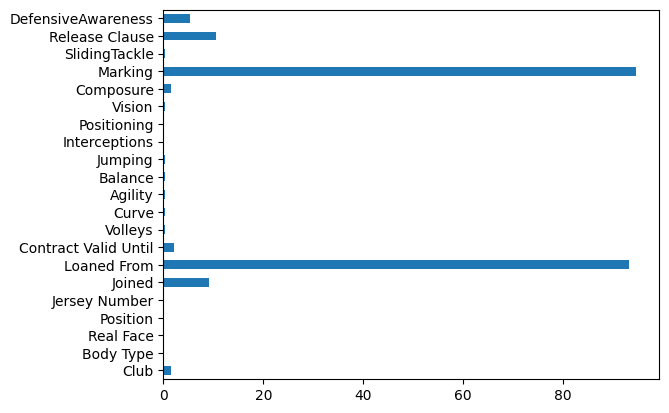

In [614]:
perc.plot(kind = 'barh')

#### Exploration

1. Clubs 
2. Age
3. Ratings
4. Nationality
5. Weak Foot 


# Clubs

In [615]:
# clubs 
data_frame.Club

0            Manchester United
1            FC Bayern München
2           Atlético de Madrid
3              Manchester City
4                   Sevilla FC
                 ...          
16705          Cheltenham Town
16706    FC Academica Clinceni
16707      Shanghai Shenhua FC
16708       ATK Mohun Bagan FC
16709                   Arezzo
Name: Club, Length: 16710, dtype: object

In [616]:
clubs = data_frame.Club.unique()
clubs

array(['Manchester United', 'FC Bayern München', 'Atlético de Madrid',
       'Manchester City', 'Sevilla FC', 'Al Ahli', 'Paris Saint-Germain',
       'Borussia Dortmund', 'Real Madrid CF', 'Real Sociedad', 'Inter',
       'FC Barcelona', 'Juventus', 'Everton', 'Eintracht Frankfurt',
       'Liverpool', 'Lazio', 'LOSC Lille', 'RB Leipzig',
       'FC Anzhi Makhachkala', 'Real Betis Balompié', 'Tottenham Hotspur',
       'Chelsea', 'Roma', 'Royal Antwerp FC', 'Olympique Lyonnais',
       'AC Milan', 'Atalanta', 'Valencia CF', 'Leicester City',
       'SL Benfica', 'Beijing Guoan FC', 'River Plate',
       'Bayer 04 Leverkusen', 'Athletic Club de Bilbao', 'Cagliari', nan,
       'Wolverhampton Wanderers', 'Al Nassr', 'FC Porto', 'Villarreal CF',
       'Arsenal', 'Unión Deportiva Almería', 'SK Slavia Praha',
       'VfL Wolfsburg', 'Al Shabab', 'LA Galaxy', 'Shanghai Port FC',
       'Borussia Mönchengladbach', 'Beşiktaş JK', 'Rangers FC',
       'AS Monaco', 'FC Red Bull Salzburg', 'Tr

In [617]:
# number of clubs 
len(clubs)

870

In [618]:
clubs_with_most_weak_foot = data_frame.loc[:,['Club','Name','Weak Foot']]
clubs_with_most_weak_foot.sort_values(by='Weak Foot', ascending=False)
five_rating_clubs_weak =clubs_with_most_weak_foot.loc[clubs_with_most_weak_foot['Weak Foot']==5.0]

In [619]:
five_rating_clubs_weak.Club.unique()

array(['Manchester City', 'Lazio', 'Tottenham Hotspur', 'Leicester City',
       'Paris Saint-Germain', 'FC Porto', 'Inter', 'SK Slavia Praha',
       'Real Madrid CF', 'Liverpool', 'Roma', 'Trabzonspor', nan,
       'Everton', 'River Plate', 'Napoli', 'SL Benfica', 'AS Monaco',
       'Internacional', 'OGC Nice', 'AC Milan', 'Torino F.C.',
       'Club América', 'Olympiacos CFP', 'West Ham United',
       'Olympique de Marseille', 'Colorado Rapids', 'Club Olimpia',
       'Beşiktaş JK', 'Hebei FC', 'Dinamo Zagreb', 'Toronto FC',
       'Club Brugge KV', 'KAS Eupen', 'Bologna', 'CA Osasuna',
       'Club Atlético Central Córdoba', 'Brighton & Hove Albion',
       'Chelsea', 'FC Barcelona', 'Orlando City Soccer Club',
       'U.S. Sassuolo Calcio', 'Feyenoord', 'Al Hilal',
       "Newell's Old Boys", 'Atakaş Hatayspor', 'Villarreal CF',
       'Melbourne City FC', 'Royale Union Saint-Gilloise',
       'Portland Timbers', 'AC Sparta Praha', 'Manchester United',
       'Bahia', 'FC Metz',

In [620]:
# By taking the mode of the club , we can get the most frequently arrived value in dataframe
five_rating_clubs_weak['Club'].mode

<bound method Series.mode of 3               Manchester City
25                        Lazio
39            Tottenham Hotspur
59               Leicester City
64          Paris Saint-Germain
                  ...          
15984       Queens Park Rangers
16126               Yokohama FC
16197    Brighton & Hove Albion
16315            CF Fuenlabrada
16409             FC Basel 1893
Name: Club, Length: 318, dtype: object>

#### Which 4 clubs have higher number of weak foot - rated players ?

- Lazio
- Tottenham
- Leicester
- Paris Saint German

# Age and skills

In [621]:
age_wise = data_frame.sort_values(by='Age',ascending=False)
age_wise.loc[age_wise['Age'] > 35]
age_wise_only_few = age_wise.loc[:,['Name','Age','Potential']]
final_cleanse_age_wise = age_wise_only_few.loc[age_wise_only_few['Age']>40]
cleanse_data_1=final_cleanse_age_wise.sort_values(by='Potential',ascending=False)
cleanse_data_1

,Name,Age,Potential
15182,G. Buffon,43,80
4913,21 Hilton,42,75
15682,S. Torrico,41,73
14932,C. Lucchetti,43,72
6717,16 C. Blanco,42,71
15242,19 O. Pérez,45,71
15907,A. Boruc,41,70
9263,21 Lee Dong Gook,41,69
16232,17 J. Jääskeläinen,41,69
13920,P. Da Silva,41,67


In [622]:

cleanse_data_1.sort_values(by='Age',ascending=False)

,Name,Age,Potential
14735,K. Miura,54,59
15242,19 O. Pérez,45,71
15182,G. Buffon,43,80
14932,C. Lucchetti,43,72
16155,08 M. Ballotta,43,66
10050,S. Nakamura,43,63
9090,K. Ellison,42,58
6717,16 C. Blanco,42,71
4913,21 Hilton,42,75
15713,J. Pinto,41,63


#### How are the skills of players as age increases?
- Please find below the graph 

<AxesSubplot:title={'center':'Age and Potentail above 40 Y/O '}, xlabel='Names of players ', ylabel='markers'>

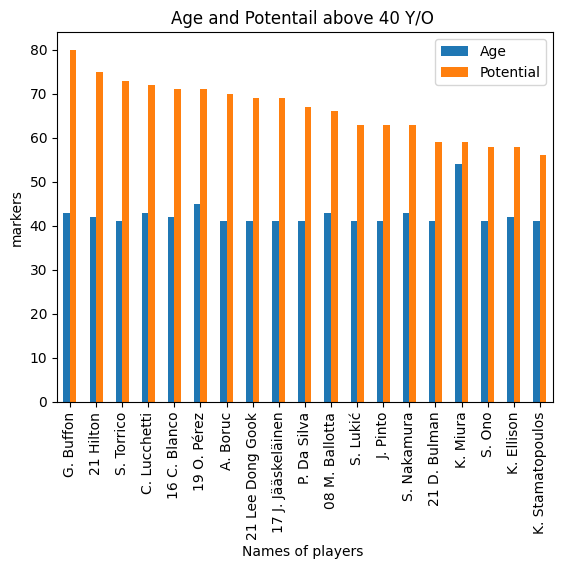

In [623]:
cl_data = cleanse_data_1.set_index('Name')
cl_data.plot(kind = 'bar', xlabel = 'Names of players ',ylabel='markers', title = 'Age and Potentail above 40 Y/O ')

In [624]:
data_frame['Age'].max()

54

# Weight And Weak Foot

In [625]:
data_frame['Weight']
data_frame.reset_index()
Weight_Weak_Frame = data_frame.loc[:,['Name','Weight','Weak Foot']]
Weight_Weak_Frame

,Name,Weight,Weak Foot
0,Bruno Fernandes,69kg,3.0
1,L. Goretzka,82kg,4.0
2,L. Suárez,83kg,4.0
3,K. De Bruyne,70kg,5.0
4,M. Acuña,69kg,3.0
...,...,...,...
16705,18 L. Clayton,80kg,2.0
16706,�. Dobre,86kg,2.0
16707,21 Xue Qinghao,71kg,2.0
16708,A. Shaikh,74kg,3.0


In [626]:
by_weak_foot = Weight_Weak_Frame.sort_values(by='Weak Foot',ascending=False)
by_weak_foot

,Name,Weight,Weak Foot
1799,B. Fornaroli,68kg,5.0
3248,M. Topal,82kg,5.0
1388,18 W. Sneijder,72kg,5.0
2223,Fernando Boldrin,75kg,5.0
5183,S. Lobjanidze,62kg,5.0
...,...,...,...
16588,Marcelo Pitaluga,78kg,1.0
1024,Lucas Lima,72kg,1.0
16583,T. Hasal,86kg,1.0
16582,T. Collins,74kg,1.0


In [627]:
by_weak_foot_sort = by_weak_foot.loc[by_weak_foot['Weak Foot']==5.0]
by_weak_foot_sort

,Name,Weight,Weak Foot
1799,B. Fornaroli,68kg,5.0
3248,M. Topal,82kg,5.0
1388,18 W. Sneijder,72kg,5.0
2223,Fernando Boldrin,75kg,5.0
5183,S. Lobjanidze,62kg,5.0
...,...,...,...
11129,C. Blackett-Taylor,75kg,5.0
6057,M. Marshall,69kg,5.0
232,W. Ben Yedder,68kg,5.0
4385,V. Fischer,73kg,5.0


#### Relation between Weak Foot and Weight ?

In [628]:
cleanse_data_2 = by_weak_foot_sort.loc[:,['Name','Weight']]
cl_data_2 =cleanse_data_2.set_index('Name')
cl_data_2


,Weight
Name,
B. Fornaroli,68kg
M. Topal,82kg
18 W. Sneijder,72kg
Fernando Boldrin,75kg
S. Lobjanidze,62kg
...,...
C. Blackett-Taylor,75kg
M. Marshall,69kg
W. Ben Yedder,68kg


In [629]:
list(cl_data_2['Weight'])


['68kg',
 '82kg',
 '72kg',
 '75kg',
 '62kg',
 '75kg',
 '67kg',
 '70kg',
 '80kg',
 '67kg',
 '73kg',
 '69kg',
 '76kg',
 '84kg',
 '85kg',
 '75kg',
 '82kg',
 '84kg',
 '93kg',
 '68kg',
 '68kg',
 '80kg',
 '73kg',
 '75kg',
 '69kg',
 '73kg',
 '77kg',
 '79kg',
 '84kg',
 '73kg',
 '89kg',
 '78kg',
 '66kg',
 '79kg',
 '76kg',
 '84kg',
 '73kg',
 '86kg',
 '76kg',
 '67kg',
 '68kg',
 '72kg',
 '62kg',
 '86kg',
 '83kg',
 '77kg',
 '72kg',
 '75kg',
 '74kg',
 '86kg',
 '79kg',
 '71kg',
 '71kg',
 '77kg',
 '72kg',
 '84kg',
 '70kg',
 '69kg',
 '85kg',
 '72kg',
 '65kg',
 '66kg',
 '73kg',
 '73kg',
 '68kg',
 '67kg',
 '80kg',
 '72kg',
 '74kg',
 '77kg',
 '71kg',
 '81kg',
 '65kg',
 '74kg',
 '72kg',
 '74kg',
 '77kg',
 '76kg',
 '78kg',
 '68kg',
 '74kg',
 '82kg',
 '72kg',
 '75kg',
 '76kg',
 '70kg',
 '72kg',
 '63kg',
 '93kg',
 '82kg',
 '88kg',
 '59kg',
 '88kg',
 '68kg',
 '77kg',
 '67kg',
 '76kg',
 '65kg',
 '80kg',
 '66kg',
 '67kg',
 '79kg',
 '76kg',
 '76kg',
 '80kg',
 '81kg',
 '65kg',
 '70kg',
 '81kg',
 '63kg',
 '65kg',
 

In [630]:
# as the weight is in string format we can't do anything to plot it . Let's write a function to slice each string as numeric value then 'kg'. and append the indexes of int into a new weight list
new_list=[]
def make_list():
    cur_list = list(cl_data_2['Weight'])
    
    
    for i in range(len(cur_list)):
        cur_list[i] = cur_list[i][:2]
        new_list.append(int(cur_list[i]))
    print(new_list)

make_list()



[68, 82, 72, 75, 62, 75, 67, 70, 80, 67, 73, 69, 76, 84, 85, 75, 82, 84, 93, 68, 68, 80, 73, 75, 69, 73, 77, 79, 84, 73, 89, 78, 66, 79, 76, 84, 73, 86, 76, 67, 68, 72, 62, 86, 83, 77, 72, 75, 74, 86, 79, 71, 71, 77, 72, 84, 70, 69, 85, 72, 65, 66, 73, 73, 68, 67, 80, 72, 74, 77, 71, 81, 65, 74, 72, 74, 77, 76, 78, 68, 74, 82, 72, 75, 76, 70, 72, 63, 93, 82, 88, 59, 88, 68, 77, 67, 76, 65, 80, 66, 67, 79, 76, 76, 80, 81, 65, 70, 81, 63, 65, 73, 77, 73, 80, 73, 62, 70, 67, 68, 67, 80, 62, 75, 82, 74, 75, 71, 79, 74, 68, 68, 82, 77, 74, 81, 66, 80, 67, 76, 72, 75, 70, 73, 91, 75, 80, 70, 76, 73, 66, 75, 75, 68, 72, 70, 87, 65, 81, 71, 78, 75, 71, 91, 67, 76, 76, 73, 67, 77, 75, 65, 66, 82, 69, 67, 74, 81, 72, 81, 70, 70, 74, 55, 74, 74, 80, 79, 66, 74, 80, 78, 76, 84, 68, 86, 72, 77, 72, 75, 72, 64, 63, 74, 82, 77, 73, 76, 72, 78, 65, 68, 77, 75, 64, 85, 70, 72, 84, 87, 79, 64, 78, 85, 78, 72, 80, 72, 71, 76, 82, 80, 72, 72, 63, 74, 74, 70, 81, 77, 66, 78, 74, 77, 81, 65, 76, 77, 73, 65,

In [631]:
# now lets add these values to the data frame
cl_data_2['Weight'] = new_list
cl_data_2


,Weight
Name,
B. Fornaroli,68
M. Topal,82
18 W. Sneijder,72
Fernando Boldrin,75
S. Lobjanidze,62
...,...
C. Blackett-Taylor,75
M. Marshall,69
W. Ben Yedder,68


In [632]:
cl_data_2['Weight'].max()

93

In [633]:
cl_data_2.sort_values(by='Weight',ascending=False)[:5]

,Weight
Name,
M. Ngadeu,93
F. Forster,93
20 H. Barcos,92
P. Pfeiffer,91
D. Nikolić,91


<AxesSubplot:xlabel='Name'>

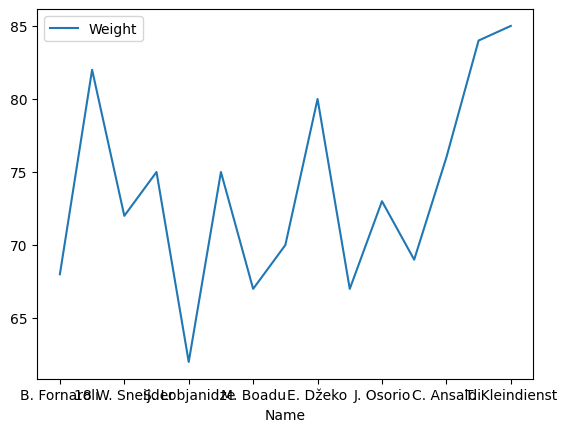

In [634]:
type(cl_data_2)
cl_data_2[:15].plot(kind = 'line')

<AxesSubplot:ylabel='Name'>

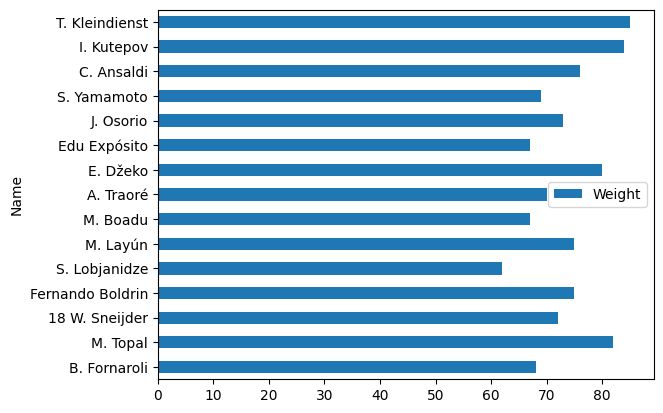

In [635]:
cl_data_2[:15].plot(kind='barh')

- Looking at the graph above , 70 kg is the average weight for a healthy soccer player
- 8 / 15 players with weak foot have weight over 70 

In [636]:
perc = (8/15)*100
perc

53.333333333333336

- 53 percent seems like a fair game that weight doesn't have much affect on having a weak foot 

# Country 

In [637]:
nation_wise_frame=data_frame.loc[:,['Name','Nationality']]
# whichever country repeats the most will have the most players

In [638]:
nation_wise_frame['Nationality'].value_counts().idxmax()

'England'

In [639]:
nation_wise_frame.sort_values(by='Nationality') #A-Z

,Name,Nationality
11542,O. Haydary,Afghanistan
6923,21 H. Amin,Afghanistan
877,K. Bare,Albania
13780,M. Mavraj,Albania
9596,A. Mehmeti,Albania
...,...,...
10033,M. Bonne,Zimbabwe
1440,K. Billiat,Zimbabwe
2822,K. Musona,Zimbabwe
14148,19 S. Songani,Zimbabwe


In [640]:
country_list = list(nation_wise_frame['Nationality'].unique())
country_list

['Portugal',
 'Germany',
 'Uruguay',
 'Belgium',
 'Argentina',
 'Brazil',
 'Netherlands',
 'France',
 'Croatia',
 'Spain',
 'Austria',
 'Italy',
 'Colombia',
 'Serbia',
 'England',
 'Chile',
 'Poland',
 'Egypt',
 'Denmark',
 "Côte d'Ivoire",
 'Ukraine',
 'Senegal',
 'Morocco',
 'Wales',
 'Ecuador',
 'Mexico',
 'Scotland',
 'Ghana',
 'Czech Republic',
 'Peru',
 'Algeria',
 'United States',
 'Bosnia and Herzegovina',
 'Armenia',
 'Korea Republic',
 'Russia',
 'Slovakia',
 'Central African Republic',
 'Turkey',
 'North Macedonia',
 'Romania',
 'Jamaica',
 'Canada',
 'Nigeria',
 'Guinea',
 'Switzerland',
 'Mali',
 'China PR',
 'Norway',
 'Sweden',
 'Zambia',
 'Republic of Ireland',
 'Australia',
 'Benin',
 'Israel',
 'Gabon',
 'Angola',
 'Montenegro',
 'Paraguay',
 'Iraq',
 'Slovenia',
 'Cameroon',
 'Iceland',
 'Finland',
 'Greece',
 'Liberia',
 'Congo DR',
 'Venezuela',
 'Kosovo',
 'Japan',
 'Moldova',
 'Honduras',
 'Tunisia',
 'Bulgaria',
 'Uzbekistan',
 'Suriname',
 'Curacao',
 'Albania

In [641]:
#write a function to get data for our plotting
nat_list ={}
def data_nat_extract():
   for i in range(len(country_list)):
        out = int(nation_wise_frame.Nationality.value_counts()[country_list[i]])
        nat_list[country_list[i]] = out

In [642]:
data_nat_extract()

In [643]:
nat_list

{'Portugal': 354,
 'Germany': 1120,
 'Uruguay': 243,
 'Belgium': 267,
 'Argentina': 846,
 'Brazil': 819,
 'Netherlands': 443,
 'France': 987,
 'Croatia': 140,
 'Spain': 1151,
 'Austria': 230,
 'Italy': 514,
 'Colombia': 257,
 'Serbia': 125,
 'England': 1845,
 'Chile': 136,
 'Poland': 261,
 'Egypt': 28,
 'Denmark': 264,
 "Côte d'Ivoire": 127,
 'Ukraine': 69,
 'Senegal': 149,
 'Morocco': 107,
 'Wales': 158,
 'Ecuador': 106,
 'Mexico': 312,
 'Scotland': 292,
 'Ghana': 124,
 'Czech Republic': 101,
 'Peru': 63,
 'Algeria': 58,
 'United States': 341,
 'Bosnia and Herzegovina': 65,
 'Armenia': 8,
 'Korea Republic': 177,
 'Russia': 108,
 'Slovakia': 51,
 'Central African Republic': 3,
 'Turkey': 246,
 'North Macedonia': 21,
 'Romania': 152,
 'Jamaica': 49,
 'Canada': 80,
 'Nigeria': 142,
 'Guinea': 34,
 'Switzerland': 182,
 'Mali': 67,
 'China PR': 79,
 'Norway': 261,
 'Sweden': 263,
 'Zambia': 10,
 'Republic of Ireland': 308,
 'Australia': 180,
 'Benin': 13,
 'Israel': 28,
 'Gabon': 17,
 'Ang

In [644]:
cl_data_3 = pd.DataFrame(list(nat_list.items()))
clean_data_fin = cl_data_3.rename(columns={0:'Country',1:'Number of Players'}).set_index('Country')


In [645]:
clean_data_fin.sort_values(by='Number of Players',ascending=False)

,Number of Players
Country,
England,1845
Spain,1151
Germany,1120
France,987
Argentina,846
...,...
Belize,1
São Tomé e Príncipe,1
Rwanda,1


In [646]:
# lets see the top 5 countries from the list
t_f =clean_data_fin.sort_values(by='Number of Players',ascending=False)
t_f[:5]


,Number of Players
Country,
England,1845
Spain,1151
Germany,1120
France,987
Argentina,846


#### Top 5 countries contributing to football are :-
- England 
- Spain
- Germany
- France
- Argentina

In [647]:
clean_data_fin.style.background_gradient(cmap ='viridis').set_properties(**{'font-size': '20px'})

,Number of Players
Country,
Portugal,354
Germany,1120
Uruguay,243
Belgium,267
Argentina,846
Brazil,819
Netherlands,443
France,987
Croatia,140


<AxesSubplot:xlabel='Country'>

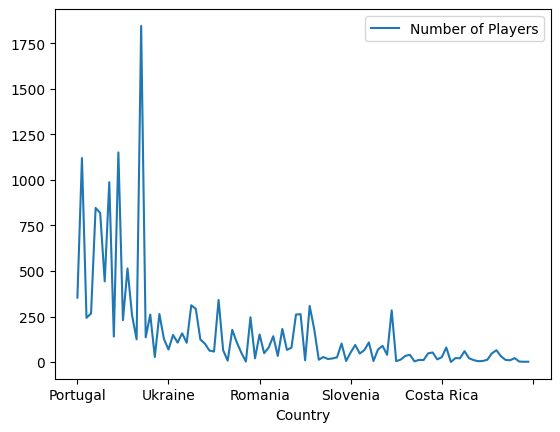

In [648]:
fig, ax = plt.subplots(1, 1)

clean_data_fin[:100].plot( ax=ax, legend=True)


<AxesSubplot:ylabel='Number of Players'>

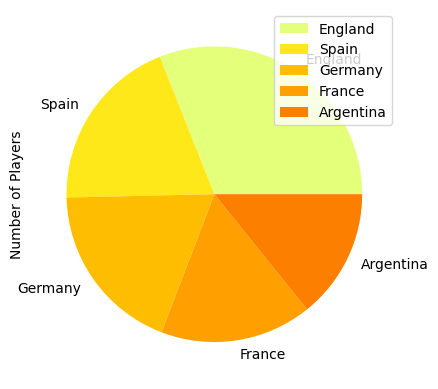

In [649]:
clean_data_fin.sort_values(by='Number of Players',ascending=False)[:5].plot(kind='pie',y='Number of Players',colormap='Wistia')

# Summary And Conclusion

### Few key points were 
- According to the data top 4 clubs have higher number of weak foot - rated players 

1. Lazio
2. Tottenham
3. Leicester
4. Paris Saint German

- Countries contributing talent are :-

1. England 
2. Spain 
3. Germany 
4. France
5. Argentina

- The maximum age of the player is 54 y/o 
 Weight Stats Top 5 
 1. M. Ngadeu	93
 2. F. Forster	93
 3. H. Barcos	92
 4. P. Pfeiffer	91
 5. D. Nikolić	91

- Players with great potential under 30



In [650]:
ad_hoc = age_wise_only_few.loc[age_wise_only_few['Age']<40]
ad_hoc.sort_values(by='Potential',ascending=False)[:5]

,Name,Age,Potential
82,K. Mbappé,22,95
14244,J. Oblak,28,93
14608,G. Donnarumma,22,93
251,E. Haaland,20,93
29,L. Messi,34,93


- Thanks and Stay safe 